In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

import keras
from keras.preprocessing import image
from keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt

from keras.applications import vgg16
from tensorflow import keras



from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


2023-10-03 19:43:19.299720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 19:43:19.409865: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-03 19:43:19.903557: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-10-03 19:43:19.903606: W tensorflow/

In [2]:
def notumor():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('0')
def glioma():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('1')
def meningioma():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('2')
def pituitary():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('3')
X = []
y = []


In [3]:

os.chdir('/home/jovyan/Training/glioma')
glioma()
os.chdir('/home/jovyan/Training/meningioma')
meningioma()
os.chdir('/home/jovyan/Training/pituitary')
pituitary()
os.chdir('/home/jovyan/Training/notumor')
notumor()

os.chdir('/home/jovyan/Testing/glioma')
glioma()
os.chdir('/home/jovyan/Testing/meningioma')
meningioma()
os.chdir('/home/jovyan/Testing/pituitary')
pituitary()
os.chdir('/home/jovyan/Testing/notumor')
notumor()

  0%|          | 0/1319 [00:00<?, ?it/s]

  0%|          | 0/1337 [00:00<?, ?it/s]

  0%|          | 0/1457 [00:00<?, ?it/s]

  0%|          | 0/1595 [00:00<?, ?it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/405 [00:00<?, ?it/s]

In [4]:
print(X[-1])
print(y[-1])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (5262, 224, 224, 3)
X_test Shape:  (1755, 224, 224, 3)
y_train Shape:  (5262, 4)
y_test Shape:  (1755, 4)


In [6]:

img_rows, img_cols = 224, 224
vgg = vgg16.VGG16(weights = 'imagenet',include_top = False,input_shape = (img_rows, img_cols, 3) )
for layer in vgg.layers:
    layer.trainable = False

for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

2023-10-03 19:43:31.197514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [7]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [8]:
num_classes = 4
FC_Head = lw(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = FC_Head)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:

model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,
                    epochs=1,
                    validation_data=(X_test,y_test))

165/165 [==============================] - 841s 5s/step - loss: 0.5402 - accuracy: 0.8366 - val_loss: 0.2217 - val_accuracy: 0.9168


1/1 [==============================] - 0s 341ms/step
[[1.65395159e-03 3.93282593e-04 1.07110925e-02 9.87241626e-01]]
3
The prediction on MRI IMAGE is PITUITARY TUMOR


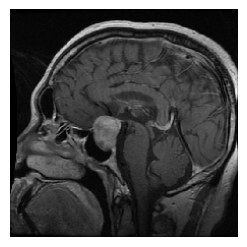

In [10]:
img = load_img('/home/jovyan/Testimage/Tr-pi_0019.jpg', target_size=(224,224))
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show
i = img_to_array(img)
input_arr = np.array([i])
predict_x=model.predict(input_arr)
class_x=np.argmax(predict_x)
print(predict_x)
print(class_x)
if(class_x == 1):
    print("The prediction on MRI IMAGE is GLIOMA TUMOR")
elif(class_x == 2):
    print("The prediction on MRI IMAGE is MENINGIOMA TUMOR")
elif(class_x == 3):
    print("The prediction on MRI IMAGE is PITUITARY TUMOR")
else:
    print("The MRI Image is Of HEALTHY BRAIN")